[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-input.ipynb)

## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?


## 업종/테마주 수집


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
# 그래프 스타일 설정
plt.style.use("ggplot")

# 폰트설정
plt.rc("font",family=font_family)

# 마이너스폰트 설정
plt.rc("axes",unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글'}>

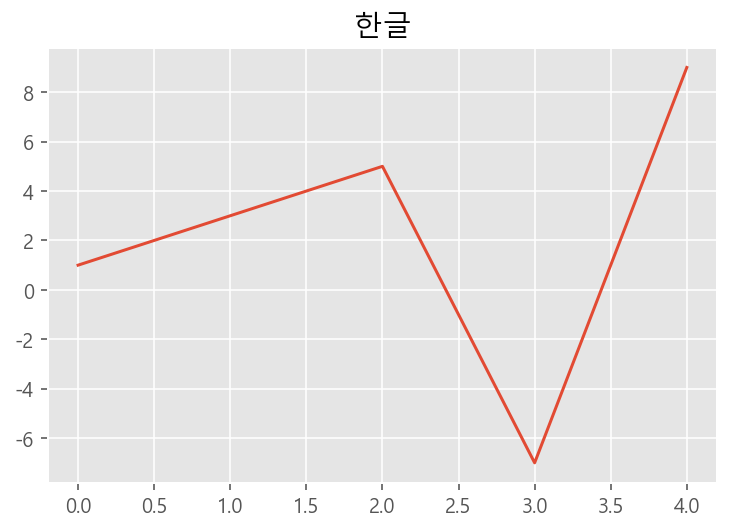

In [6]:
pd.Series([1,3,5,-7,9]).plot(title="한글")

### 자동차업종 수집하기
* https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35

In [7]:
url="https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=273"
print(url)

https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=273


In [8]:
table=pd.read_html(url,encoding="cp949")
table

[   업종명    전일대비 전일대비 등락현황                등락그래프
    업종명    전일대비        전체   상승   보합   하락 등락그래프
 0  자동차  +0.93%       8.0  4.0  3.0  1.0   13%
 1  NaN     NaN       NaN  NaN  NaN  NaN   NaN
 2  NaN     NaN       NaN  NaN  NaN  NaN   NaN,
      0      1          2        3          4       5
 0  거래량   매수호가   거래대금(백만)  시가총액(억)    영업이익(억)  PER(배)
 1   시가   매도호가      전일거래량  자산총계(억)    영업이익증가율  ROE(%)
 2   고가  매수총잔량      외국인비율  부채총계(억)   당기순이익(억)  ROA(%)
 3   저가  매도총잔량  상장주식수(천주)   매출액(억)   주당순이익(원)  PBR(배)
 4  NaN    NaN        NaN   매출액증가율  보통주배당금(원)  유보율(%),
          종목명       현재가     전일비     등락률      매수호가      매도호가        거래량  \
 0        NaN       NaN     NaN     NaN       NaN       NaN        NaN   
 1        현대차  242000.0  2500.0  +1.04%  241500.0  242000.0  1025525.0   
 2         기아   90500.0   900.0  +1.00%   90400.0   90500.0  2949200.0   
 3      KR모터스    1235.0    10.0  +0.82%    1230.0    1235.0   392724.0   
 4   엘브이엠씨홀딩스    3780.0    30.0  +0.80%    3780.0    3790.0   848954.

In [9]:
len(table)

3

In [10]:
table[2].shape

(11, 12)

In [11]:
table[2]

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,NaN,NaN,NaN
2,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,NaN,NaN,NaN
3,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,NaN,NaN,NaN
4,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,NaN,NaN,NaN
5,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6,현대차2우B,115000.0,0.0,0.00%,115000.0,115500.0,95739.0,10950.0,113308.0,NaN,NaN,NaN
7,현대차3우B,109500.0,0.0,0.00%,109000.0,109500.0,10034.0,1087.0,7626.0,NaN,NaN,NaN
8,현대차우,115000.0,500.0,-0.43%,115000.0,115500.0,51425.0,5916.0,42634.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
raw=table[2].dropna(how="all",axis=0).dropna(how="all",axis=1)
raw

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0
2,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0
3,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0
4,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0
5,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0
6,현대차2우B,115000.0,0.0,0.00%,115000.0,115500.0,95739.0,10950.0,113308.0
7,현대차3우B,109500.0,0.0,0.00%,109000.0,109500.0,10034.0,1087.0,7626.0
8,현대차우,115000.0,500.0,-0.43%,115000.0,115500.0,51425.0,5916.0,42634.0


## 파생변수 만들기

In [13]:
import datetime

today=datetime.datetime.today().strftime("%Y-%m-%d")
today

'2021-07-01'

In [14]:
raw["조회일자"]=today

In [15]:
raw

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01
2,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01
3,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01
4,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01
5,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01
6,현대차2우B,115000.0,0.0,0.00%,115000.0,115500.0,95739.0,10950.0,113308.0,2021-07-01
7,현대차3우B,109500.0,0.0,0.00%,109000.0,109500.0,10034.0,1087.0,7626.0,2021-07-01
8,현대차우,115000.0,500.0,-0.43%,115000.0,115500.0,51425.0,5916.0,42634.0,2021-07-01


## 거래량과 거래대금 시각화

<AxesSubplot:ylabel='종목명'>

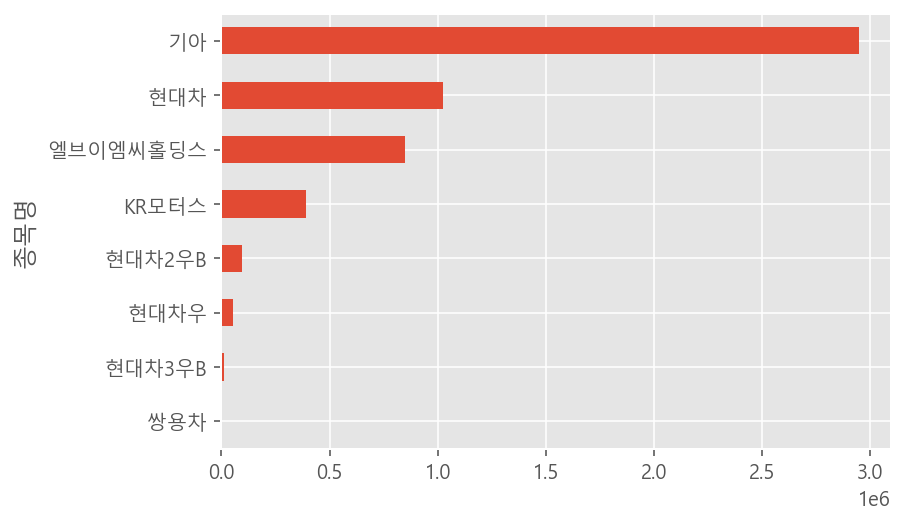

In [16]:
raw.set_index("종목명").sort_values("거래량")["거래량"].plot.barh()

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [17]:
import FinanceDataReader as fdr
df_krx=fdr.StockListing("krx")
df_krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7126,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7127,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7128,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7129,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [18]:
item_code_name=df_krx[["Symbol","Name"]]
item_code_name

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템
...,...,...
7126,000547,흥국화재2우B
7127,000545,흥국화재우
7128,003280,흥아해운
7129,037440,희림


In [19]:
raw.shape, item_code_name.shape

((8, 10), (7131, 2))

In [20]:
df=pd.merge(raw,item_code_name,left_on="종목명",right_on="Name")
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,Symbol,Name
0,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01,005380,현대차
1,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01,000270,기아
2,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01,000040,KR모터스
3,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01,900140,엘브이엠씨홀딩스
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01,003620,쌍용차


In [21]:
df=df.rename(columns={"Symbol":"종목코드"})
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드,Name
0,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01,005380,현대차
1,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01,000270,기아
2,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01,000040,KR모터스
3,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01,900140,엘브이엠씨홀딩스
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01,003620,쌍용차
5,현대차2우B,115000.0,0.0,0.00%,115000.0,115500.0,95739.0,10950.0,113308.0,2021-07-01,005387,현대차2우B
6,현대차3우B,109500.0,0.0,0.00%,109000.0,109500.0,10034.0,1087.0,7626.0,2021-07-01,005389,현대차3우B
7,현대차우,115000.0,500.0,-0.43%,115000.0,115500.0,51425.0,5916.0,42634.0,2021-07-01,005385,현대차우


In [22]:
df.drop("Name",axis=1)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드
0,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01,005380
1,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01,000270
2,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01,000040
3,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01,900140
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01,003620
5,현대차2우B,115000.0,0.0,0.00%,115000.0,115500.0,95739.0,10950.0,113308.0,2021-07-01,005387
6,현대차3우B,109500.0,0.0,0.00%,109000.0,109500.0,10034.0,1087.0,7626.0,2021-07-01,005389
7,현대차우,115000.0,500.0,-0.43%,115000.0,115500.0,51425.0,5916.0,42634.0,2021-07-01,005385


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [23]:
item_code = "000040"
item_name = "KR모터스"

In [24]:
item_url=f"https://finance.naver.com/item/main.nhn?code={item_code}"
print(item_url)

https://finance.naver.com/item/main.nhn?code=000040


In [25]:
tables=pd.read_html(item_url,encoding="cp949")
len(tables)

13

In [26]:
tables[3]

주요재무정보 최근 연간 실적                             최근 분기 실적                  \
       주요재무정보  2018.12  2019.12 2020.12 2021.12(E)  2020.03 2020.06 2020.09   
       주요재무정보   IFRS연결   IFRS연결  IFRS연결     IFRS연결   IFRS연결  IFRS연결  IFRS연결   
0         매출액      366     1326    1178        NaN   286.00  312.00  291.00   
1        영업이익     -163     -247      12        NaN     4.00    8.00    1.00   
2       당기순이익     -244     -410    -115        NaN    -9.00   -2.00  -15.00   
3       영업이익률   -44.46   -18.59    1.03        NaN     1.35    2.42    0.34   
4        순이익률   -66.85   -30.96   -9.75        NaN    -2.98   -0.49   -5.02   
5   ROE(지배주주)   -49.31  -113.29  -29.64        NaN  -127.05  -74.95  -70.69   
6        부채비율   121.62   309.20  212.72        NaN   341.08  171.79  171.47   
7        당좌비율    92.73    43.16   53.41        NaN    42.83   55.08   52.58   
8         유보율   -35.08   -86.23  -35.01        NaN   -48.24  -19.74  -22.36   
9      EPS(원)     -755     -855    -107        NaN   -17.00   -7.00  -13.00   
10     PER(배)    -2.15    -1.06  -10.58        NaN    -0.79   -1.09   -1.70   
11     BPS(원)     1117      392     396        NaN   390.00  459.00  453.00   
12     PBR(배)     1.45     2.31    2.86        NaN     1.54    1.45    1.69   
13   주당배당금(원)        -      NaN       -        NaN      NaN     NaN     NaN   
14   시가배당률(%)        -      NaN       -        NaN      NaN     NaN     NaN   
15    배당성향(%)        -        -       -        NaN      NaN     NaN     NaN   

                               
   2020.12 2021.03 2021.06(E)  
    IFRS연결  IFRS연결     IFRS연결  
0      290  227.00        NaN  
1        -   -9.00        NaN  
2      -90  -21.00        NaN  
3    -0.07   -3.94        NaN  
4   -31.13   -9.23        NaN  
5   -29.64  -29.30        NaN  
6   212.72  212.01        NaN  
7    53.41   50.02        NaN  
8   -35.01  -24.60        NaN  
9      -62  -15.00        NaN  
10  -10.58  -13.22        NaN  
11     396  428.00        NaN  
12    2.86    3.07        NaN  
13     NaN     NaN        NaN  
14     NaN     NaN        NaN  
15     NaN     NaN        NaN

## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [27]:
finance_info=tables[3].iloc[:,[0,-2]]
finance_info
finance_info.columns=[0,1]
finance_info

,0,1
0,매출액,227.00
1,영업이익,-9.00
2,당기순이익,-21.00
3,영업이익률,-3.94
4,순이익률,-9.23
5,ROE(지배주주),-29.30
6,부채비율,212.01
7,당좌비율,50.02
8,유보율,-24.60
9,EPS(원),-15.00


In [28]:
item_info=[]
item_info.append(finance_info)
for i in range (len(tables)):
    if tables[i].shape[1]==2:
        item_info.append(tables[i])

In [29]:
item_info

[            0       1
 0         매출액  227.00
 1        영업이익   -9.00
 2       당기순이익  -21.00
 3       영업이익률   -3.94
 4        순이익률   -9.23
 5   ROE(지배주주)  -29.30
 6        부채비율  212.01
 7        당좌비율   50.02
 8         유보율  -24.60
 9      EPS(원)  -15.00
 10     PER(배)  -13.22
 11     BPS(원)  428.00
 12     PBR(배)    3.07
 13   주당배당금(원)     NaN
 14   시가배당률(%)     NaN
 15    배당성향(%)     NaN,
           0            1
 0      시가총액    1,187  억원
 1    시가총액순위     코스피 816위
 2     상장주식수     96137368
 3  액면가l매매단위  500원  l  1주,
              0         1
 0  외국인한도주식수(A)  96137368
 1  외국인보유주식수(B)  44241720
 2  외국인소진율(B/A)    46.02%,
            0              1
 0  투자의견l목표주가    N/A  l  N/A
 1   52주최고l최저  1,630  l  628,
                    0               1
 0   PERlEPS(2021.03)    N/A  l  -99원
 1          추정PERlEPS     N/A  l  N/A
 2  PBRlBPS (2021.03)  2.89배  l  428원
 3              배당수익률             NaN,
           0       1
 0  동일업종 PER  21.50배
 1  동일업종 등락률  +0.93%]

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [30]:
len(item_info)

6

In [31]:
df_item=pd.concat(item_info)
df_item

,0,1
0,매출액,227.0
1,영업이익,-9.0
2,당기순이익,-21.0
3,영업이익률,-3.94
4,순이익률,-9.23
5,ROE(지배주주),-29.3
6,부채비율,212.01
7,당좌비율,50.02
8,유보율,-24.6
9,EPS(원),-15.0


## transpose를 통해 행과 열의 위치를 변경

In [32]:
df_item.T

,0,1,2,3,4,5,6,7,8,9,...,1,2,0,1,0,1,2,3,0,1
0,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률,동일업종 PER,동일업종 등락률
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44241720,46.02%,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%


## 개별 주가 정보를 수집하는 함수를 생성

In [33]:
def get_item_info(item_code):
    item_url=f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables=pd.read_html(item_url,encoding="cp949")
    finance_info=tables[3].iloc[:,[0,-2]]
    finance_info.columns=[0,1]
    item_info=[]
    item_info.append(finance_info)
    for i in range(len(tables)):
        if tables[i].shape[1]==2:
            item_info.append(tables[i])
    df=pd.concat(item_info)
    df=df.set_index(0)
    df=df.T
    return df

In [34]:
get_item_info("000040")

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률,동일업종 PER,동일업종 등락률
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44241720,46.02%,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [35]:
from tqdm.auto import tqdm
tqdm.pandas()

In [36]:
result=df["종목코드"].apply(get_item_info)

In [37]:
result

0    0       매출액     영업이익    당기순이익 영업이익률  순이익률 ROE(...
1    0       매출액     영업이익    당기순이익 영업이익률  순이익률 ROE(...
2    0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부...
3    0    매출액  영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)   부...
4    0     매출액   영업이익  당기순이익  영업이익률  순이익률 ROE(지배주주)...
5    0       매출액     영업이익    당기순이익 영업이익률  순이익률 ROE(...
6    0       매출액     영업이익    당기순이익 영업이익률  순이익률 ROE(...
7    0       매출액     영업이익    당기순이익 영업이익률  순이익률 ROE(...
Name: 종목코드, dtype: object

In [38]:
df_item_info=pd.concat(result.tolist())
df_item_info

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률l2020.12,동일업종 PER,동일업종 등락률,배당수익률
1,273909.0,16566.0,15222.0,6.05,5.56,3.27,178.82,45.58,4938.89,4793.0,...,29.75%,"4.00매수 l 314,474","289,000 l 98,000","29.29배 l 8,263원","12.00배 l 20,357원","0.89배 l 271,275원",1.24%,21.50배,+0.93%,NaN
1,165817.0,10764.0,10350.0,6.49,6.24,7.58,107.52,83.68,1384.38,2553.0,...,33.67%,"4.00매수 l 115,789","102,000 l 31,900","16.26배 l 5,567원","9.00배 l 10,240원","1.18배 l 76,884원",1.11%,21.50배,+0.93%,NaN
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,46.02%,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%,NaN
1,595.0,-14.0,-57.0,-2.28,-9.49,-7.73,83.48,80.07,1456.2,-59.0,...,16.49%,N/A l N/A,"4,775 l 2,961",N/A l -384원,N/A l N/A,"0.87배 l 4,329원",NaN,21.50배,+0.93%,NaN
1,5358.0,-847.0,-863.0,-15.81,-16.1,-253.59,1770.56,19.56,-123.52,-576.0,...,76.57%,N/A l N/A,"6,200 l 2,485","N/A l -2,650원",N/A l N/A,4.02배 l 689원,NaN,21.50배,+0.93%,NaN
1,273909.0,16566.0,15222.0,6.05,5.56,3.27,178.82,45.58,4938.89,4793.0,...,61.34%,"4.00매수 l 314,474","127,000 l 56,300","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.70%,21.50배,+0.93%,NaN
1,273909.0,16566.0,15222.0,6.05,5.56,3.27,178.82,45.58,4938.89,4793.0,...,30.47%,"4.00매수 l 314,474","128,000 l 54,000","13.25배 l 8,263원","5.00배 l 20,357원","0.40배 l 271,275원",2.79%,21.50배,+0.93%,NaN
1,273909.0,16566.0,15222.0,6.05,5.56,3.27,178.82,45.58,4938.89,4793.0,...,58.78%,"4.00매수 l 314,474","135,000 l 54,100","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.65%,21.50배,+0.93%,NaN


## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [39]:
df_item_info["종목코드"]=df["종목코드"].tolist()
df_item_info

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률l2020.12,동일업종 PER,동일업종 등락률,배당수익률,종목코드
1,273909.0,16566.0,15222.0,6.05,5.56,3.27,178.82,45.58,4938.89,4793.0,...,"4.00매수 l 314,474","289,000 l 98,000","29.29배 l 8,263원","12.00배 l 20,357원","0.89배 l 271,275원",1.24%,21.50배,+0.93%,NaN,005380
1,165817.0,10764.0,10350.0,6.49,6.24,7.58,107.52,83.68,1384.38,2553.0,...,"4.00매수 l 115,789","102,000 l 31,900","16.26배 l 5,567원","9.00배 l 10,240원","1.18배 l 76,884원",1.11%,21.50배,+0.93%,NaN,000270
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%,NaN,000040
1,595.0,-14.0,-57.0,-2.28,-9.49,-7.73,83.48,80.07,1456.2,-59.0,...,N/A l N/A,"4,775 l 2,961",N/A l -384원,N/A l N/A,"0.87배 l 4,329원",NaN,21.50배,+0.93%,NaN,900140
1,5358.0,-847.0,-863.0,-15.81,-16.1,-253.59,1770.56,19.56,-123.52,-576.0,...,N/A l N/A,"6,200 l 2,485","N/A l -2,650원",N/A l N/A,4.02배 l 689원,NaN,21.50배,+0.93%,NaN,003620
1,273909.0,16566.0,15222.0,6.05,5.56,3.27,178.82,45.58,4938.89,4793.0,...,"4.00매수 l 314,474","127,000 l 56,300","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.70%,21.50배,+0.93%,NaN,005387
1,273909.0,16566.0,15222.0,6.05,5.56,3.27,178.82,45.58,4938.89,4793.0,...,"4.00매수 l 314,474","128,000 l 54,000","13.25배 l 8,263원","5.00배 l 20,357원","0.40배 l 271,275원",2.79%,21.50배,+0.93%,NaN,005389
1,273909.0,16566.0,15222.0,6.05,5.56,3.27,178.82,45.58,4938.89,4793.0,...,"4.00매수 l 314,474","135,000 l 54,100","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.65%,21.50배,+0.93%,NaN,005385


## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [40]:
df.head(1)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드,Name
0,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01,005380,현대차


In [41]:
df_item_info.head(1)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률l2020.12,동일업종 PER,동일업종 등락률,배당수익률,종목코드
1,273909.0,16566.0,15222.0,6.05,5.56,3.27,178.82,45.58,4938.89,4793.0,...,"4.00매수 l 314,474","289,000 l 98,000","29.29배 l 8,263원","12.00배 l 20,357원","0.89배 l 271,275원",1.24%,21.50배,+0.93%,NaN,005380


In [42]:
df_info=df.merge(df_item_info,on="종목코드")
df_info

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률l2020.12,동일업종 PER,동일업종 등락률,배당수익률
0,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01,...,29.75%,"4.00매수 l 314,474","289,000 l 98,000","29.29배 l 8,263원","12.00배 l 20,357원","0.89배 l 271,275원",1.24%,21.50배,+0.93%,NaN
1,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01,...,33.67%,"4.00매수 l 115,789","102,000 l 31,900","16.26배 l 5,567원","9.00배 l 10,240원","1.18배 l 76,884원",1.11%,21.50배,+0.93%,NaN
2,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01,...,46.02%,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%,NaN
3,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01,...,16.49%,N/A l N/A,"4,775 l 2,961",N/A l -384원,N/A l N/A,"0.87배 l 4,329원",NaN,21.50배,+0.93%,NaN
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01,...,76.57%,N/A l N/A,"6,200 l 2,485","N/A l -2,650원",N/A l N/A,4.02배 l 689원,NaN,21.50배,+0.93%,NaN
5,현대차2우B,115000.0,0.0,0.00%,115000.0,115500.0,95739.0,10950.0,113308.0,2021-07-01,...,61.34%,"4.00매수 l 314,474","127,000 l 56,300","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.70%,21.50배,+0.93%,NaN
6,현대차3우B,109500.0,0.0,0.00%,109000.0,109500.0,10034.0,1087.0,7626.0,2021-07-01,...,30.47%,"4.00매수 l 314,474","128,000 l 54,000","13.25배 l 8,263원","5.00배 l 20,357원","0.40배 l 271,275원",2.79%,21.50배,+0.93%,NaN
7,현대차우,115000.0,500.0,-0.43%,115000.0,115500.0,51425.0,5916.0,42634.0,2021-07-01,...,58.78%,"4.00매수 l 314,474","135,000 l 54,100","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.65%,21.50배,+0.93%,NaN


In [43]:
df.shape, df_item_info.shape, df_info.shape

((8, 12), (8, 33), (8, 44))

## 파일명 만들기

In [44]:
url.split("=")[2]

'273'

In [45]:
filename=url.split("=")[1].replace("&","_")+'_'+url.split("=")[2]+'_'+today+".csv"
filename

'upjong_no_273_2021-07-01.csv'

In [46]:
df_info.to_csv(filename,index=False)

In [47]:
pd.read_csv(filename)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률l2020.12,동일업종 PER,동일업종 등락률,배당수익률
0,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01,...,29.75%,"4.00매수 l 314,474","289,000 l 98,000","29.29배 l 8,263원","12.00배 l 20,357원","0.89배 l 271,275원",1.24%,21.50배,+0.93%,NaN
1,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01,...,33.67%,"4.00매수 l 115,789","102,000 l 31,900","16.26배 l 5,567원","9.00배 l 10,240원","1.18배 l 76,884원",1.11%,21.50배,+0.93%,NaN
2,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01,...,46.02%,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%,NaN
3,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01,...,16.49%,N/A l N/A,"4,775 l 2,961",N/A l -384원,N/A l N/A,"0.87배 l 4,329원",NaN,21.50배,+0.93%,NaN
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01,...,76.57%,N/A l N/A,"6,200 l 2,485","N/A l -2,650원",N/A l N/A,4.02배 l 689원,NaN,21.50배,+0.93%,NaN
5,현대차2우B,115000.0,0.0,0.00%,115000.0,115500.0,95739.0,10950.0,113308.0,2021-07-01,...,61.34%,"4.00매수 l 314,474","127,000 l 56,300","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.70%,21.50배,+0.93%,NaN
6,현대차3우B,109500.0,0.0,0.00%,109000.0,109500.0,10034.0,1087.0,7626.0,2021-07-01,...,30.47%,"4.00매수 l 314,474","128,000 l 54,000","13.25배 l 8,263원","5.00배 l 20,357원","0.40배 l 271,275원",2.79%,21.50배,+0.93%,NaN
7,현대차우,115000.0,500.0,-0.43%,115000.0,115500.0,51425.0,5916.0,42634.0,2021-07-01,...,58.78%,"4.00매수 l 314,474","135,000 l 54,100","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.65%,21.50배,+0.93%,NaN
